#Week HW3 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1Q6W1IZCqskmmYxPCfRLrsCoqy5SPsXEo)

# Task 1

## Given

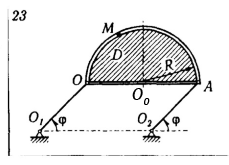

$
OM = s_r(t) = 6\pi t^2;\\
\phi (t) = \pi t^3/6;\\
R = 18, O_1O=O_2A=20
$

## To find

1. Simulate mechanism
1. $v^{abs}_M, v^{tr}_M, v^{rel}_M$
1. $a^{abs}_M, a^{tr}_M, a^{rel}_M$
1. $t$ when $M$ reaches $A$


## Solution

### Calculations

#### Prepare the timeline

In [ ]:
import numpy as np 
from sympy import Symbol

# set the timeframe
t0 = 0
t1 = 4
dt = 0.01 #25 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

#### Constants

In [ ]:
R = 18
H = 20

O0O = np.array([-R, 0, 0])
O0 = np.array([0, H, 0])
O0A = np.array([R, 0, 0])
O1 = np.array([-R, 0, 0])
O2 = np.array([R, 0, 0])

#### Rotation of $M$ (relative)

$
\omega^{rel} = 
\begin{bmatrix}
0\\
0\\
12\pi \frac{t}{R}
\end{bmatrix}= 
\begin{bmatrix}
0\\
0\\
\frac{2}{3}\pi t
\end{bmatrix}
\\
ε^{rel} = 
\begin{bmatrix}
0\\
0\\
\frac{2}{3}\pi 
\end{bmatrix}
$

In [ ]:
t = Symbol('t')
sr = 6*np.pi*t**2
phi_rel = np.pi-sr/R

print("ang vel:", phi_rel.diff(t))
print("ang acc:", phi_rel.diff(t).diff(t))
OM = [sr.evalf(subs={t:i}) for i in T]
omega_rel = np.transpose([[0, 0, phi_rel.diff(t).evalf(subs={t:i})] for i in T])
epsilon_rel = np.transpose([[0, 0, phi_rel.diff(t).diff(t).evalf(subs={t:i})] for i in T])

ang vel: -2.0943951023932*t
ang acc: -2.09439510239320


#### Rotation of $O_0$ (transport)

$
\omega^{tr} = 
\begin{bmatrix}
0\\
0\\
\pi t^2/2
\end{bmatrix}
\\
ε^{tr} = 
\begin{bmatrix}
0\\
0\\
\pi t
\end{bmatrix}
$

In [ ]:
phi_tr = np.pi*t**3/6
print("ang vel:", phi_tr.diff(t))
print("ang acc:", phi_tr.diff(t).diff(t))
omega_tr = np.transpose([[0, 0, phi_tr.diff(t).evalf(subs={t:i})] for i in T])
epsilon_tr = np.transpose([[0, 0, phi_tr.diff(t).diff(t).evalf(subs={t:i})] for i in T])

ang vel: 1.5707963267949*t**2
ang acc: 3.14159265358979*t


#### Positions of points

* $\underline{
\vec{O_1} = 
\begin{bmatrix}
-R\\
0\\
0
\end{bmatrix}};\ 
\underline{\vec{O_2} = 
\begin{bmatrix}
R\\
0\\
0
\end{bmatrix}}
$
* $
\underline{\vec{O_0} = 
\begin{bmatrix}
cos(\phi^{tr})\\
sin(\phi^{tr})\\
0
\end{bmatrix}H}
$
* $
\vec{O_0O} = 
\begin{bmatrix}
-R\\
0\\
0
\end{bmatrix};\ 
\vec{O_0A} = 
\begin{bmatrix}
R\\
0\\
0
\end{bmatrix};\ 
\vec{O_0M} = 
\begin{bmatrix}
cos(\phi^{rel})\\
sin(\phi^{rel})\\
0
\end{bmatrix}R
$
* $
\underline{\vec{O} = \vec O_0 + \vec {O_0O}}\\
\underline{\vec{A} = \vec O_0 + \vec {O_0A}}\\
\underline{\vec{M} = \vec O_0 + \vec {O_0M}}
$


In [ ]:
phi_tr1 = [float(phi_tr.evalf(subs={t:i})) for i in T]
phi_rel1 = [float(phi_rel.evalf(subs={t:i})) for i in T]


O0 = np.transpose([[np.cos(phi),
                     np.sin(phi),
                     0] for phi in phi_tr1])*H


O0M = np.transpose([[np.cos(phi),
                     np.sin(phi),
                     0] for phi in phi_rel1])*R

M = O0+O0M

# print(O1)
# print(O1M)

#### Velocities


$\underline{\vec V = \vec V^{rel} + \vec V^{tr}}
\\
\underline{\vec V_M^{rel} = \vec \omega_\theta\times \vec {O_0M}}
\\
\underline{\vec V_M^{tr} = \vec V_{O_1}+\vec\omega^{tr}\times \vec{O_1M} = \vec\omega^{tr}\times\vec {O_1M}}$

In [ ]:
v_rel = np.transpose(np.cross(omega_rel, O0M, axisa=0, axisb=0))
v_tr = np.transpose(np.cross(omega_tr, O0, axisa=0, axisb=0))
v = v_rel + v_tr
# print(v_tr)

#### Accelerations

$\underline{\vec a_M = \vec a_M^{tr}+\vec a_M^{cor}+\vec a_M^{rel}}
\\
\underline{\vec a_M^{tr} = \vec a_{n}^{tr} + \vec a_{\tau}^{tr} = (\vec ε^{tr}\times\vec M) + \vec\omega^{tr}\times(\vec\omega^{tr}\times\vec M)}
\\
\underline{\vec a_M^{cor} = 2\vec\omega_{tr}\times\vec v^{rel}}
\\
\underline{\vec a_M^{rel} = \vec a_{n}^{rel} + \vec a_{\tau}^{rel} = (\vec ε^{rel}\times\vec M) + \vec\omega^{rel}\times(\vec\omega^{rel}\times\vec{O_0M})}$


In [ ]:
a_tr = np.transpose(np.cross(epsilon_tr, O0, axisa=0, axisb=0) +
                    np.cross(epsilon_tr, np.cross(epsilon_tr, O0, axisa=0, axisb=0), axisa=0))
a_cor = 2*np.transpose(np.cross(omega_tr, v_rel, axisa=0, axisb=0))
a_rel = np.transpose(np.cross(epsilon_rel, O0, axisa=0, axisb=0) +
                     np.cross(epsilon_rel, np.cross(epsilon_rel, O0M, axisa=0, axisb=0), axisa=0))
a = a_tr + a_cor + a_rel

#### $M$ reaches $A$

When $OM = \pi R$

$
6\pi t^2 = \pi 18\\
t^2 = 3
$

$M$ reaches $A$ at: $\underline{t = \sqrt{3}}$

### Plotting

#### Vector drawer

In [ ]:
from matplotlib.lines import Line2D
# Gateher all the moving vectors and plug them into given plots ax1 (dynamic), ax2 (static)
class draw_vec:
  def __init__(self, labels, parent, vectors, ax1, ax2, col=None, lw1=None, lw2=None, scale=None, scale1 = 1, loc='upper left'):
    self.n = len(vectors)
    self.parent = {'x': parent[0], 'y':parent[1]}
    self.vectors = {'x': vectors[:, 0], 'y':vectors[:, 1]}
    self.q1 = ax1.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw1, visible=False,
                         scale=1/scale/scale1, angles='xy', scale_units='xy', zorder = 10)
    self.q2 = ax2.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw2, visible=False,
                         scale=1/scale, angles='xy', scale_units='xy', zorder = 10)
    
    custom_lines = [Line2D([0], [0], color=i, lw=4) for i in col]
    fig.legend(custom_lines, labels, loc=loc)

  def draw(self, n, show = True):
    self.q1.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q2.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q1.set_offsets([self.parent['x'][n], self.parent['y'][n]])
    self.q1.set_visible(show)
    self.q2.set_visible(show)

  def getVectors(self):
    return([self.q1, self.q2])

#### Actual Plotting

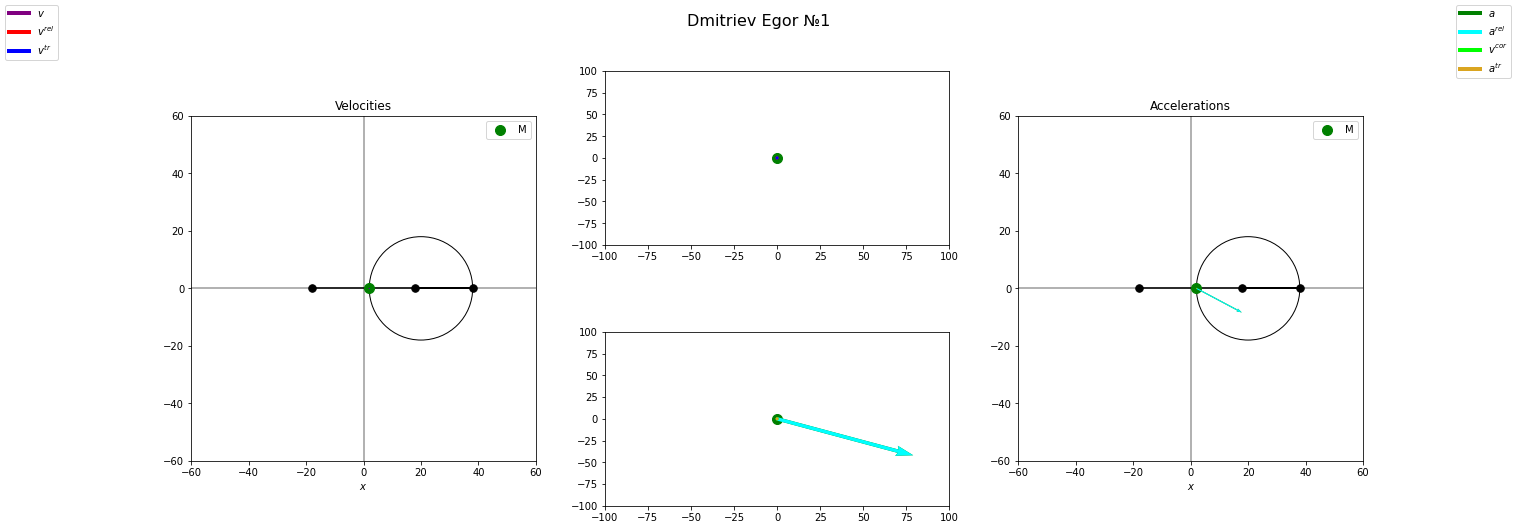

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №1", fontsize=16)
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.5)

ax1 = plt.subplot(grid[:, 0], aspect='equal')
ax1.set_xlim(-60,60)
ax1.set_ylim(-60,60)
ax1.set_xlabel(r'$x$')
ax1.axhline(y=0, color='k', alpha=0.4)
ax1.axvline(x=0, color='k', alpha=0.4)
txt_title = ax1.set_title('Velocities')

g1 = plt.subplot(grid[0, 1])
g1.plot(0, 0, 'g.', ms=20)
g1.set_xlim(-100,100)
g1.set_ylim(-100,100)
g2 = plt.subplot(grid[1, 1])
g2.plot(0, 0, 'g.', ms=20)
g2.set_xlim(-100,100)
g2.set_ylim(-100,100)

ax2 = plt.subplot(grid[:, 2], aspect='equal')
ax2.set_xlim(-60,60)
ax2.set_ylim(-60,60)
ax2.set_xlabel(r'$x$')
ax2.axhline(y=0, color='k', alpha=0.4)
ax2.axvline(x=0, color='k', alpha=0.4)
txt_title2 = ax2.set_title('Accelerations')

frame = np.array([[O1, O0[:, i]+O0O, O0[:, i]+O0A, O2] for i in range(O0.shape[1])])
# print(frame.shape)

## ax1
circle = patches.Circle(O0[:2,0], radius=R, fill=False, transform=ax1.transData)
ax1.add_artist(circle)

f_frame, = ax1.plot(frame[0, :, 0], frame[0, :, 1], 'k.-', ms=15)
p_M, = ax1.plot(*(M)[:2,0], 'g.', ms=20, label='M')

v_v = draw_vec([r'$v$', r'$v^{rel}$', r'$v^{tr}$', ], (M)[:2], np.array([v, v_rel, v_tr], dtype=float), 
               col = ['purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=g1, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_v.draw(0)
ax1.legend()

## ax2
circle2 = patches.Circle(O0[:2,0], radius=R, fill=False, transform=ax2.transData)
ax2.add_artist(circle2)

f2_frame, = ax2.plot(frame[0, :, 0], frame[0, :, 1], 'k.-', ms=15)
p2_M, = ax2.plot(*(M)[:2,0], 'g.', ms=20, label='M')

v_a = draw_vec([r'$a$', r'$a^{rel}$', r'$v^{cor}$', r'$a^{tr}$'], (M)[:2], np.array([a, a_rel, a_cor, a_tr], dtype=float), 
               col = ['green', 'cyan', 'lime', 'goldenrod'], loc = 'upper right',
               scale = 1, ax1=ax2, ax2=g2, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_a.draw(0)
ax2.legend()


def drawframe(n):
  circle.set_center(O0[:2,n])
  p_M.set_data((M)[:2,n])
  f_frame.set_data(frame[n, :, 0], frame[n, :, 1])
  v_v.draw(n)
  
  circle2.set_center(O0[:2,n])
  p2_M.set_data((M)[:2,n])
  f2_frame.set_data(frame[n, :, 0], frame[n, :, 1])
  v_a.draw(n)
  
  txt_title.set_text('t = {0:4f}'.format(T[n]))
  txt_title2.set_text('t = {0:4f}'.format(T[n]))
  return( )

#### Animation

In [ ]:
from matplotlib import animation

#comment to run online
# plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\egord\AppData\Local\ffmpeg\bin\ffmpeg.exe'

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=40, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

# Task 2

## Given

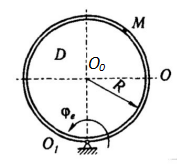

$
OM = s_r(t) = 75\pi(0.1t + 0.3t^2);\\
\phi (t) = 2t - 0.3t^2;\\
R = 30.
$

## To find

1. Simulate mechanism
1. $v^{abs}_M, v^{tr}_M, v^{rel}_M$
1. $a^{abs}_M, a^{tr}_M, a^{rel}_M$
1. $t$ when $M$ reaches $O$ (makes full circle)
1. Plot all of the above

## Solution

### Calculations

#### Prepare the timeline

In [ ]:
import numpy as np 
from sympy import Symbol

# set the timeframe
t0 = 0
t1 = 4
dt = 0.01 #25 fps

T = np.arange(t0, t1, dt) # generate an array of timestamps

#### Constants

In [ ]:
R = 30

O = np.array([R, R, 0])
O0 = np.array([0, R, 0])
O1 = np.array([0, 0, 0])

#### Rotation of $M$ (relative)

$
\omega^{rel} = 
\begin{bmatrix}
0\\
0\\
(0.1+0.6t)\frac{75\pi}{R}
\end{bmatrix}
\\
ε^{rel} = 
\begin{bmatrix}
0\\
0\\
0.6\frac{75\pi}{R}
\end{bmatrix}
$

In [ ]:
t = Symbol('t')
sr = 75*np.pi*(0.1*t+0.3*t**2)
phi_rel = 75*np.pi*(0.1*t+0.3*t**2)/R

OM = [sr.evalf(subs={t:i}) for i in T]
omega_rel = np.transpose([[0, 0, phi_rel.diff(t).evalf(subs={t:i})] for i in T])
epsilon_rel = np.transpose([[0, 0, phi_rel.diff(t).diff(t).evalf(subs={t:i})] for i in T])

#### Rotation of $O_0$ (transport)

$
\omega^{tr} = 
\begin{bmatrix}
0\\
0\\
2-0.6t
\end{bmatrix}
\\
ε^{tr} = 
\begin{bmatrix}
0\\
0\\
-0.6
\end{bmatrix}
$

In [ ]:
phi_tr = 2*t-0.3*t**2

omega_tr = np.transpose([[0, 0, phi_tr.diff(t).evalf(subs={t:i})] for i in T])
epsilon_tr = np.transpose([[0, 0, phi_tr.diff(t).diff(t).evalf(subs={t:i})] for i in T])

#### Positions of points

* $
\underline{\vec{O_0} = 
\begin{bmatrix}
sin(\phi)\\
cos(\phi)\\
0
\end{bmatrix}R}
$
* $
\vec{O_0O} = 
\begin{bmatrix}
cos(\phi)\\
sin(\phi)\\
0
\end{bmatrix}R
$
* $
\vec{O_0M} = 
\begin{bmatrix}
cos(\phi+\theta)\\
sin(\phi+\theta)\\
0
\end{bmatrix}R
$
* $
\underline{\vec O = \vec O_0 + \vec{O_0O}};\ 
\underline{\vec M = \vec O_0 + \vec{O_0M}};\ 
$

In [ ]:
phi_tr1 = [float(phi_tr.evalf(subs={t:i})) for i in T]
phi_rel1 = [float(phi_rel.evalf(subs={t:i})) for i in T]


O0 = np.transpose([[-np.sin(phi),
                     np.cos(phi),
                     0] for phi in phi_tr1])*R

O0O = np.transpose([[np.cos(phi),
                     np.sin(phi),
                     0] for phi in phi_tr1])*R

O0M = np.transpose([[np.cos(phi_tr1[i]+phi_rel1[i]),
                     np.sin(phi_tr1[i]+phi_rel1[i]),
                     0] for i in range(len(phi_rel1))])*R

M = O0+O0M

# print(O1)
# print(O1M)

#### Velocities


$
\underline{\vec V = \vec V^{rel} + \vec V^{tr}}
\\
\underline{\vec V_M^{rel} = \vec \omega_\theta\times \vec {O_0M}}
\\
\underline{\vec V_M^{tr} = \vec V_{O_1}+\vec\omega^{tr}\times \vec{O_1M} = \vec\omega^{tr}\times\vec {O_1M}}
$

In [ ]:
v_rel = np.transpose(np.cross(omega_rel, O0M, axisa=0, axisb=0))
v_tr = np.transpose(np.cross(omega_tr, M, axisa=0, axisb=0))
v = v_rel + v_tr
# print(v_tr)

#### Accelerations

$
\underline{\vec a_M = \vec a_M^{tr}+\vec a_M^{cor}+\vec a_M^{rel}}
\\
\underline{\vec a_M^{tr} = \vec a_{n}^{tr} + \vec a_{\tau}^{tr} = (\vec ε^{tr}\times\vec M) + \vec\omega^{tr}\times(\vec\omega^{tr}\times\vec M)}
\\
\underline{\vec a_M^{cor} = 2\vec\omega_{tr}\times\vec v^{rel}}
\\
\underline{\vec a_M^{rel} = \vec a_{n}^{rel} + \vec a_{\tau}^{rel} = (\vec ε^{rel}\times\vec{O_0M}) + \vec\omega^{rel}\times(\vec\omega^{rel}\times\vec{O_0M})}
$


In [ ]:
a_tr = np.transpose(np.cross(epsilon_tr, M, axisa=0, axisb=0) +
                    np.cross(epsilon_tr, np.cross(epsilon_tr, M, axisa=0, axisb=0), axisa=0))
a_cor = 2*np.transpose(np.cross(omega_tr, v_rel, axisa=0, axisb=0))
a_rel = np.transpose(np.cross(epsilon_rel, O0M, axisa=0, axisb=0) +
                     np.cross(epsilon_rel, np.cross(epsilon_rel, O0M, axisa=0, axisb=0), axisa=0))
a = a_tr + a_cor + a_rel

#### $M$ reaches $O$

When $OM = 2\pi R$

$
75\pi (0.1t + 0.3t^2) = 60\pi\\
5(0.1t + 0.3t^2) = 4\\
t + 3t^2 = 8\\
t = -1/6 \pm sqrt(97)/6$

$M$ reaches $O$ at: $\underline{t \simeq 1.4748}$

### Plotting

#### Vector drawer

In [ ]:
from matplotlib.lines import Line2D
# Gateher all the moving vectors and plug them into given plots ax1 (dynamic), ax2 (static)
class draw_vec:
  def __init__(self, labels, parent, vectors, ax1, ax2, col=None, lw1=None, lw2=None, scale=None, scale1 = 1, loc='upper left'):
    self.n = len(vectors)
    self.parent = {'x': parent[0], 'y':parent[1]}
    self.vectors = {'x': vectors[:, 0], 'y':vectors[:, 1]}
    self.q1 = ax1.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw1, visible=False,
                         scale=1/scale/scale1, angles='xy', scale_units='xy', zorder = 10)
    self.q2 = ax2.quiver(np.zeros(self.n), np.zeros(self.n), np.zeros(self.n),
                         np.zeros(self.n), color=col, width=lw2, visible=False,
                         scale=1/scale, angles='xy', scale_units='xy', zorder = 10)
    
    custom_lines = [Line2D([0], [0], color=i, lw=4) for i in col]
    fig.legend(custom_lines, labels, loc=loc)

  def draw(self, n, show = True):
    self.q1.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q2.set_UVC(self.vectors['x'][:,n], self.vectors['y'][:,n])
    self.q1.set_offsets([self.parent['x'][n], self.parent['y'][n]])
    self.q1.set_visible(show)
    self.q2.set_visible(show)

  def getVectors(self):
    return([self.q1, self.q2])

#### Actual plotting

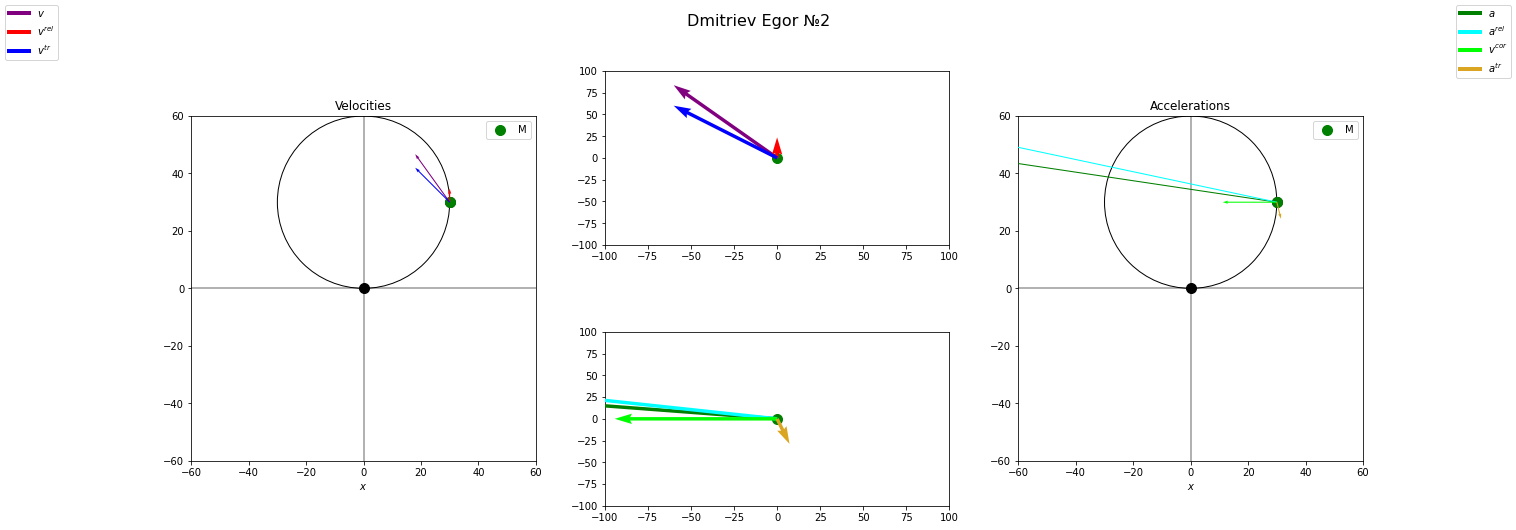

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(21,8))
fig.suptitle("Dmitriev Egor №2", fontsize=16)
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.5)

ax1 = plt.subplot(grid[:, 0], aspect='equal')
ax1.set_xlim(-60,60)
ax1.set_ylim(-60,60)
ax1.set_xlabel(r'$x$')
ax1.axhline(y=0, color='k', alpha=0.4)
ax1.axvline(x=0, color='k', alpha=0.4)
txt_title = ax1.set_title('Velocities')

g1 = plt.subplot(grid[0, 1])
g1.plot(0, 0, 'g.', ms=20)
g1.set_xlim(-100,100)
g1.set_ylim(-100,100)
g2 = plt.subplot(grid[1, 1])
g2.plot(0, 0, 'g.', ms=20)
g2.set_xlim(-100,100)
g2.set_ylim(-100,100)

ax2 = plt.subplot(grid[:, 2], aspect='equal')
ax2.set_xlim(-60,60)
ax2.set_ylim(-60,60)
ax2.set_xlabel(r'$x$')
ax2.axhline(y=0, color='k', alpha=0.4)
ax2.axvline(x=0, color='k', alpha=0.4)
txt_title2 = ax2.set_title('Accelerations')

## ax1
circle = patches.Circle(O0[:2,0], radius=R, fill=False, transform=ax1.transData)
ax1.add_artist(circle)

p_O1, = ax1.plot(0, 0, 'k.', ms=20)
p_O, = ax1.plot(*(O0+O0O)[:2,0], 'k.', ms=20)
p_M, = ax1.plot(*(M)[:2,0], 'g.', ms=20, label='M')

v_v = draw_vec([r'$v$', r'$v^{rel}$', r'$v^{tr}$', ], (M)[:2], np.array([v, v_rel, v_tr], dtype=float), 
               col = ['purple', 'red', 'blue'],
               scale = 1, ax1=ax1, ax2=g1, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_v.draw(0)
ax1.legend()

## ax2
circle2 = patches.Circle(O0[:2,0], radius=R, fill=False, transform=ax2.transData)
ax2.add_artist(circle2)

p2_O1, = ax2.plot(0, 0, 'k.', ms=20)
p2_O, = ax2.plot(*(O0+O0O)[:2,0], 'k.', ms=20)
p2_M, = ax2.plot(*(M)[:2,0], 'g.', ms=20, label='M')

v_a = draw_vec([r'$a$', r'$a^{rel}$', r'$v^{cor}$', r'$a^{tr}$'], (M)[:2], np.array([a, a_rel, a_cor, a_tr], dtype=float), 
               col = ['green', 'cyan', 'lime', 'goldenrod'], loc = 'upper right',
               scale = 1, ax1=ax2, ax2=g2, lw1 = 0.003, lw2=0.01, scale1 = 0.2)
v_a.draw(0)
ax2.legend()


def drawframe(n):
  circle.set_center(O0[:2,n])
  p_O.set_data((O0+O0O)[:2,n])
  p_M.set_data((M)[:2,n])
  v_v.draw(n)
  
  circle2.set_center(O0[:2,n])
  p2_O.set_data((O0+O0O)[:2,n])
  p2_M.set_data((M)[:2,n])
  v_a.draw(n)
  
  txt_title.set_text('t = {0:4f}'.format(T[n]))
  txt_title2.set_text('t = {0:4f}'.format(T[n]))
  return( )

#### Animation

In [ ]:
from matplotlib import animation

#comment to run online
# plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\egord\AppData\Local\ffmpeg\bin\ffmpeg.exe'

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=len(T), interval=40, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())